In [74]:
import pandas as pd
loan_data = pd.read_csv("load_data.csv")
loan_data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.3504,19.48,737,5639.9583,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.0821,14.29,707,2760.0000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.3735,11.63,682,4710.0000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.3504,8.10,712,2699.9583,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.2997,14.97,667,4066.0000,4740,39.5,0,1,0,0


In [75]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      100 non-null    int64  
 1   purpose            100 non-null    object 
 2   int_rate           100 non-null    float64
 3   installment        100 non-null    float64
 4   log_annual_inc     100 non-null    float64
 5   dti                100 non-null    float64
 6   fico               100 non-null    int64  
 7   days_with_cr_line  100 non-null    float64
 8   revol_bal          100 non-null    int64  
 9   revol_util         100 non-null    float64
 10  inq_last_6mths     100 non-null    int64  
 11  delinq_2yrs        100 non-null    int64  
 12  pub_rec            100 non-null    int64  
 13  not_fully_paid     100 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 11.1+ KB


In [76]:
percent_missing =round(100*(loan_data.isnull().sum())/len(loan_data),2)
percent_missing

credit_policy        0.0
purpose              0.0
int_rate             0.0
installment          0.0
log_annual_inc       0.0
dti                  0.0
fico                 0.0
days_with_cr_line    0.0
revol_bal            0.0
revol_util           0.0
inq_last_6mths       0.0
delinq_2yrs          0.0
pub_rec              0.0
not_fully_paid       0.0
dtype: float64

In [77]:
# Assuming the correct column name is 'not_fully_paid' instead of 'not.fully.paid'
cleaned_data = loan_data.drop(['purpose', 'not_fully_paid'], axis=1)
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      100 non-null    int64  
 1   int_rate           100 non-null    float64
 2   installment        100 non-null    float64
 3   log_annual_inc     100 non-null    float64
 4   dti                100 non-null    float64
 5   fico               100 non-null    int64  
 6   days_with_cr_line  100 non-null    float64
 7   revol_bal          100 non-null    int64  
 8   revol_util         100 non-null    float64
 9   inq_last_6mths     100 non-null    int64  
 10  delinq_2yrs        100 non-null    int64  
 11  pub_rec            100 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 9.5 KB


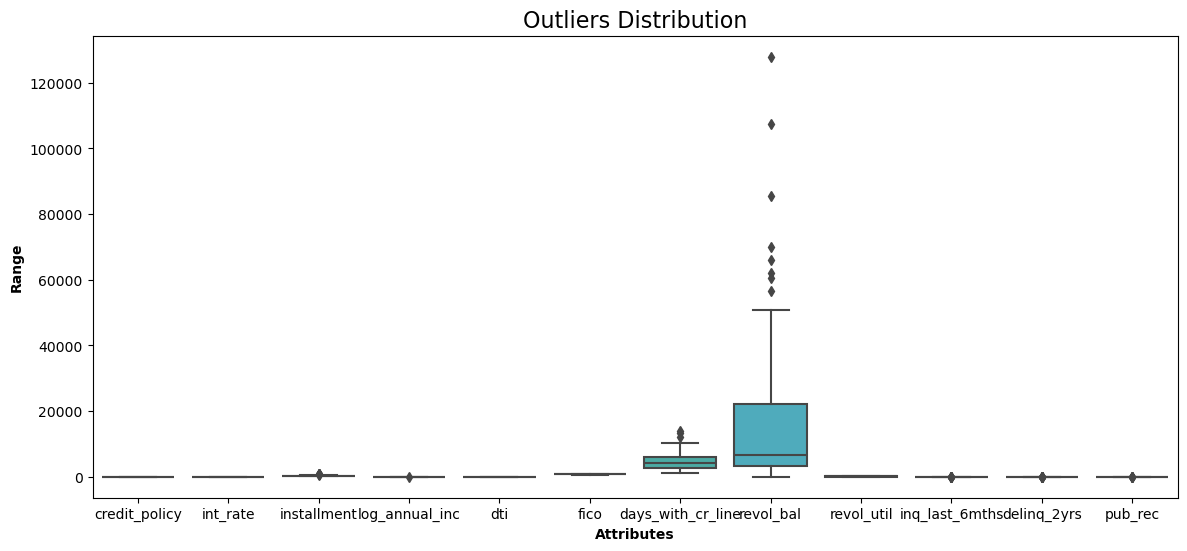

In [78]:
# import matplotlib.pyplot as plt
# import seaborn as sns

def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14, 6]
    sns.boxplot(data=df, orient="v")
    plt.title("Outliers Distribution", fontsize=16)
    plt.ylabel("Range", fontweight='bold')
    plt.xlabel("Attributes", fontweight='bold')
    # plt.show()  # Add this to display the plot

# Assuming cleaned_data is your DataFrame
show_boxplot(cleaned_data)

In [79]:
def remove_outliers(data):
    df = data.copy()
    
    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
    
    return df


In [80]:
without_outliers = remove_outliers(cleaned_data)

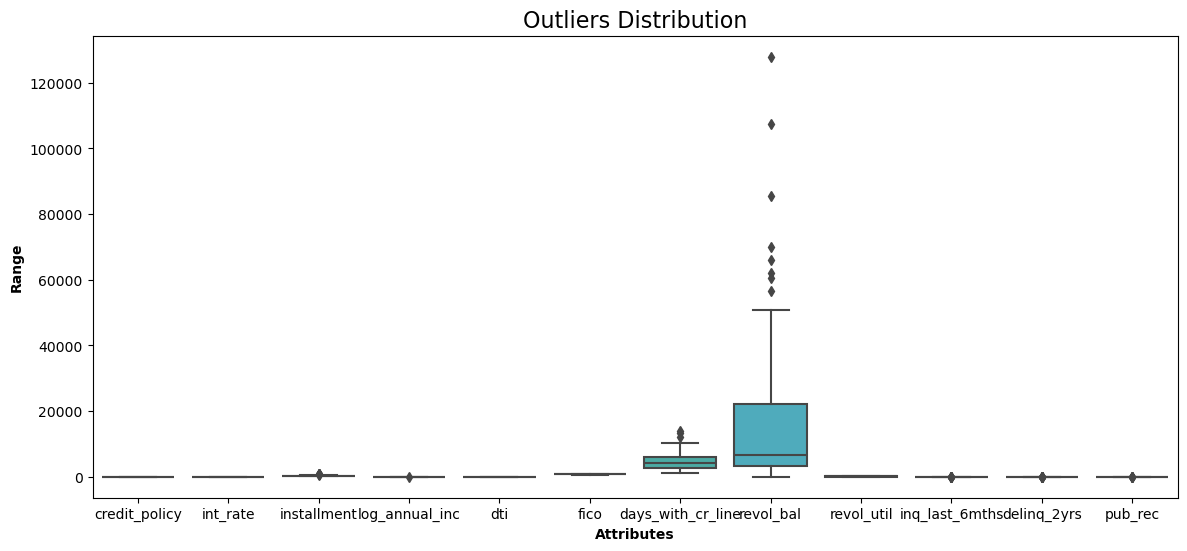

In [81]:
show_boxplot(without_outliers)

In [82]:
without_outliers.shape

(100, 12)

In [83]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(100, 12)

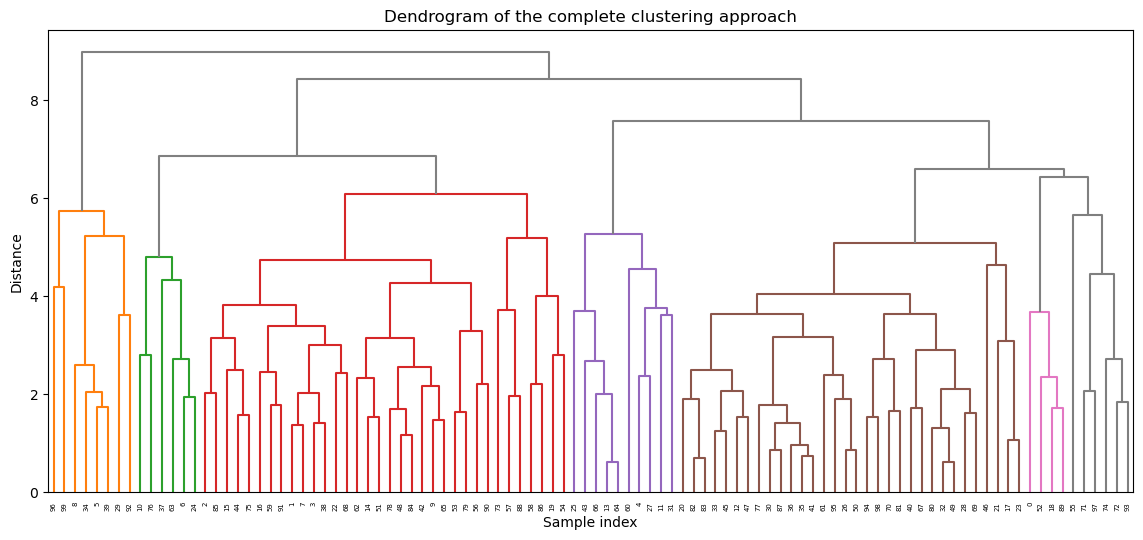

In [84]:
# from scipy.cluster.hierarchy import linkage, dendrogram

# complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
# average_clustering = linkage(scaled_data, method="average", metric="euclidean")
# single_clustering = linkage(scaled_data, method="single", metric="euclidean")


import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming `scaled_data` is your scaled DataFrame
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")

plt.figure(figsize=(14, 6))
dendrogram(
    complete_clustering,
    color_threshold=0.7 * max(complete_clustering[:, 2]),  # Adjust the threshold as needed
    above_threshold_color='grey',  # Color for branches above the threshold
)
plt.title("Dendrogram of the complete clustering approach")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


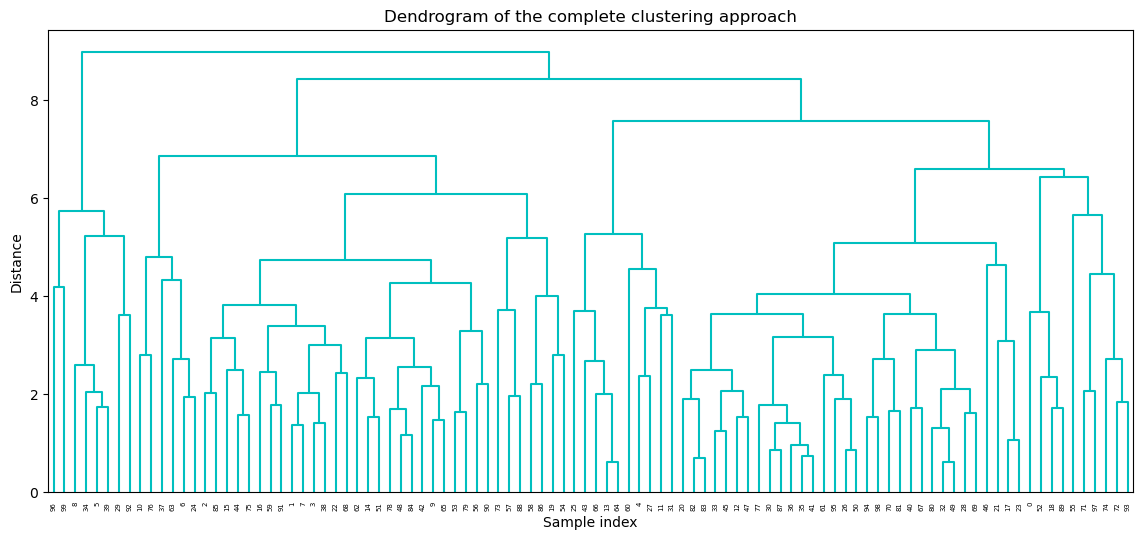

In [85]:
# dendrogram(complete_clustering)
# plt.show()

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming `scaled_data` is your scaled DataFrame
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")

def color_func(x):
    if x < 10:
        return 'r'
    elif x < 20:
        return 'g'
    elif x < 30:
        return 'b'
    else:
        return 'c'

plt.figure(figsize=(14, 6))
dendrogram(
    complete_clustering,
    color_threshold=0.7 * max(complete_clustering[:, 2]),  # Adjust the threshold as needed
    link_color_func=color_func,  # Function to assign colors
    above_threshold_color='grey',  # Color for branches above the threshold
)
plt.title("Dendrogram of the complete clustering approach")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


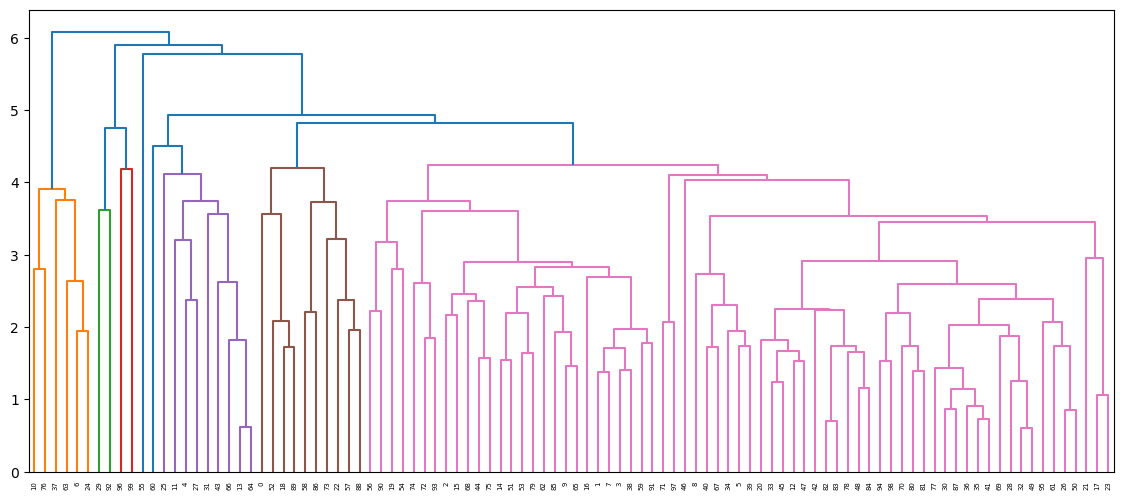

In [86]:
dendrogram(average_clustering)
plt.show()

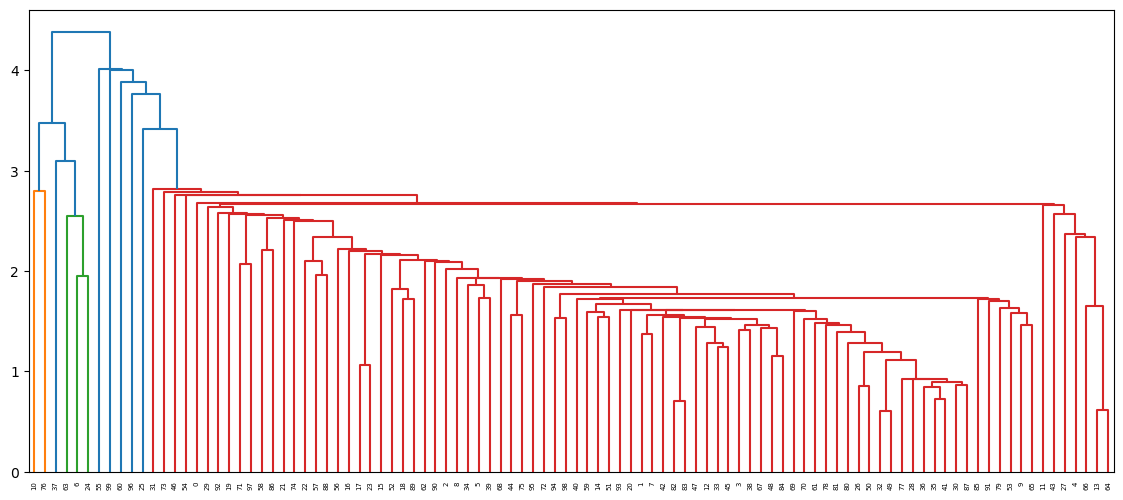

In [87]:
dendrogram(single_clustering)
plt.show()

# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# # Assuming `data` is your DataFrame and `single_clustering` is your linkage matrix
# single_clustering = linkage(scaled_data, method='single')

# plt.figure(figsize=(14, 6))
# dendrogram(single_clustering, color_threshold=0.5)  # Adjust color_threshold as needed
# plt.title("Dendrogram")
# plt.xlabel("Sample index")
# plt.ylabel("Distance")
# plt.show()
# dendrogram(
#     single_clustering,
#     color_threshold=0.5,  # Adjust this to see more distinct color changes
#     above_threshold_color='red',  # Set color for above threshold branches
#     leaf_rotation=90,  # Rotate x-axis labels if needed
#     leaf_font_size=10,  # Adjust font size for better readability
# )



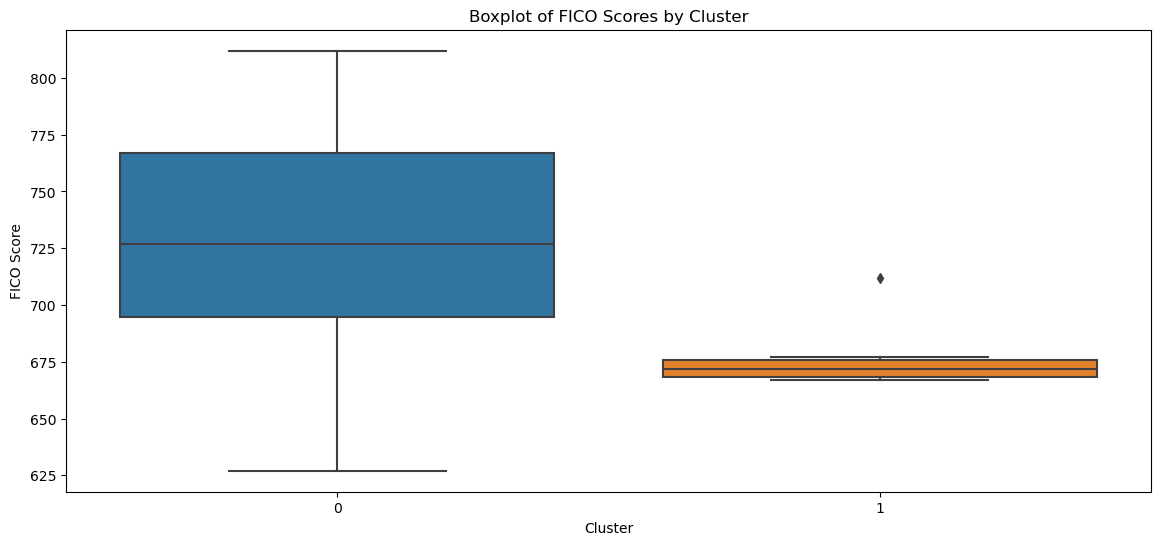

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import cut_tree

# Assuming average_clustering and without_outliers are already defined
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
without_outliers["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='fico', data=without_outliers)
plt.title("Boxplot of FICO Scores by Cluster")
plt.xlabel("Cluster")
plt.ylabel("FICO Score")
plt.show()
